## Question 1: tSNE Dim Reduction

Run library/package on MNIST and 20NG to obtain a 2-dim or 3-dim representation.

Visualize data by plotting datapoints with a color per label. 

Try different values for perplexity: (5, 20, 100)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import _twenty_newsgroups
from torchvision import datasets, transforms
import torch
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from tqdm import tqdm
from sklearn.metrics import silhouette_score


In [4]:
# Q1. a) MNIST dataset


# Load the MNIST dataset
mnist_data = datasets.MNIST(root='./data', train = True, download=True, transform=transforms.ToTensor())

# Perform t-SNE on the MNIST dataset
X = mnist_data.data.numpy().reshape(-1, 28*28)
y = mnist_data.targets.numpy()
X_embedded = TSNE(n_components=2).fit_transform(X)

# Plot the t-SNE results (color for each label)
plt.figure(figsize=(10, 10))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap='tab10', s=10)
plt.colorbar()
plt.title('t-SNE on MNIST dataset')
plt.show()

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:04<00:00, 2.24MB/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.12MB/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 2.00MB/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<?, ?B/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



KeyboardInterrupt: 

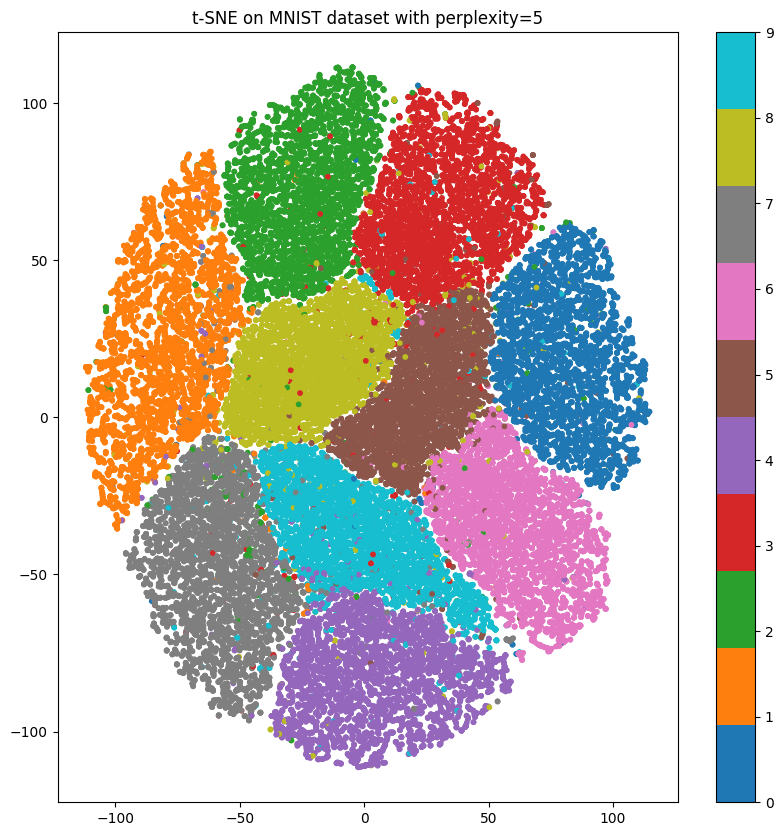

KeyboardInterrupt: 

In [5]:
# Perform different Perplexities:
perplexities = [5,20, 100]

for perplexity in perplexities:
    X_embedded = TSNE(n_components=2, perplexity=perplexity).fit_transform(X)
    plt.figure(figsize=(10, 10))
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap='tab10', s=10)
    plt.colorbar()
    plt.title(f't-SNE on MNIST dataset with perplexity={perplexity}')
    plt.show()



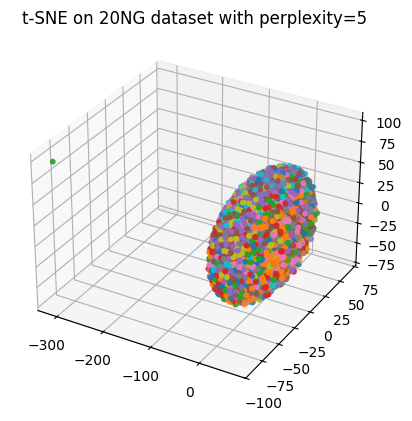

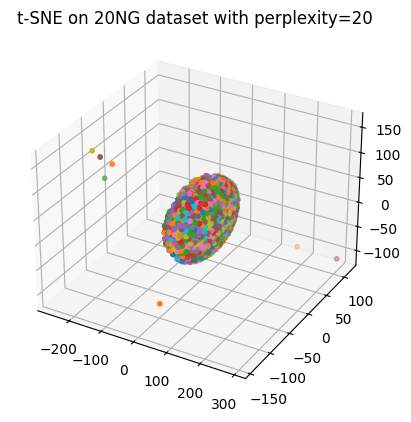

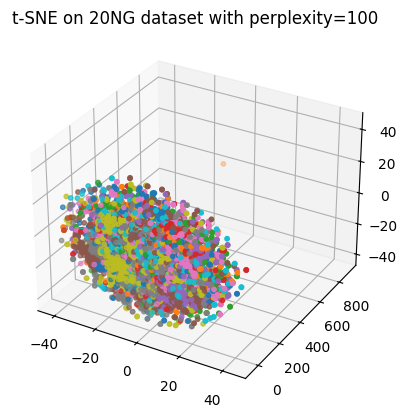

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Q1. a) 20NG dataset
ng_data = _twenty_newsgroups.fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))

# Convert text data to numerical features using TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Limit features for better performance
X = vectorizer.fit_transform(ng_data.data).toarray()
y = ng_data.target

# Perform t-SNE on the 20NG dataset
for perplexity in perplexities:
    X_embedded = TSNE(n_components=3, perplexity=perplexity).fit_transform(X)
    # plot in 3d
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_embedded[:, 0], X_embedded[:, 1], X_embedded[:, 2], c=y, cmap='tab10', s=10)
    plt.title(f't-SNE on 20NG dataset with perplexity={perplexity}')
    plt.show()

    

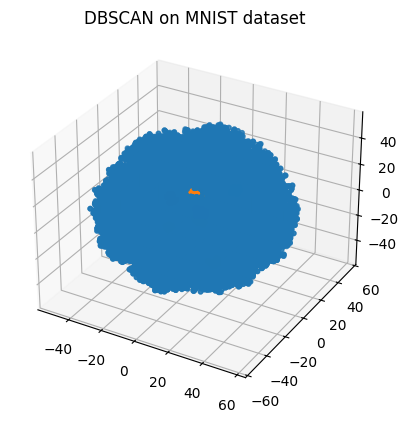

In [ ]:
# Q1. b) DBSCAN clustering
# Perform DBSCAN clustering on the MNIST dataset of G = 2,3,5 dimensions. 
# Check confusion matrix with TSNE into 3 dimensions
# DBSCAN parameters (eps=9.75, minpts=33)

### 3 dimensions
mnist_data = datasets.MNIST(root='./data', train = True, download=True, transform=transforms.ToTensor())

# Perform t-SNE on the MNIST dataset #G = 3
X = mnist_data.data.numpy().reshape(-1, 28*28)
y = mnist_data.targets.numpy()
X_embedded = TSNE(n_components=3, perplexity=3).fit_transform(X)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=3, min_samples=33)
y_dbscan = dbscan.fit_predict(X_embedded)

# Plot the t-SNE results (color for each label)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_embedded[:, 0], X_embedded[:, 1], X_embedded[:, 2], c=y_dbscan, cmap='tab10', s=10)
plt.title('DBSCAN on MNIST dataset')
plt.show()



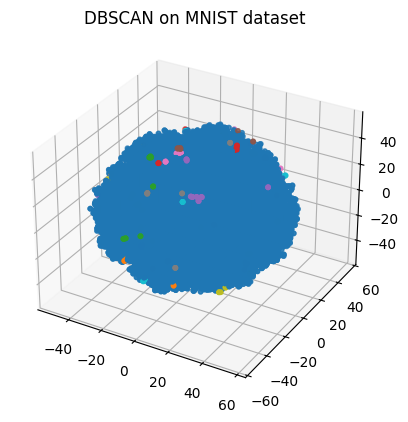

In [74]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=4, min_samples=1)
y_dbscan = dbscan.fit_predict(X_embedded)

# Plot the t-SNE results (color for each label)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_embedded[:, 0], X_embedded[:, 1], X_embedded[:, 2], c=y_dbscan, cmap='tab10', s=10)
plt.title('DBSCAN on MNIST dataset')
plt.show()



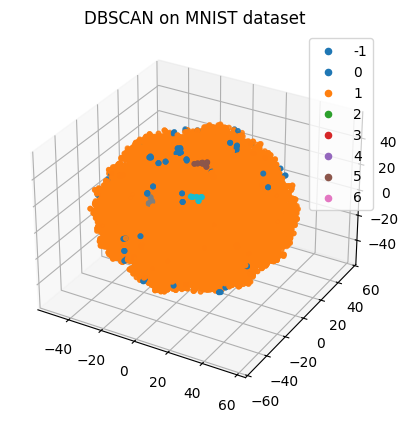

In [91]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=4.05, min_samples=12)
y_dbscan = dbscan.fit_predict(X_embedded)

# plot afterwards in 3d:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_embedded[:, 0], X_embedded[:, 1], X_embedded[:, 2], c=y_dbscan, cmap='tab10', s=10)
#show legend of colors
unique_labels = np.unique(y_dbscan)
for label in unique_labels:
    ax.scatter([], [], [], label=label, color=plt.cm.tab10(label))

plt.title('DBSCAN on MNIST dataset')
plt.legend()
plt.show()

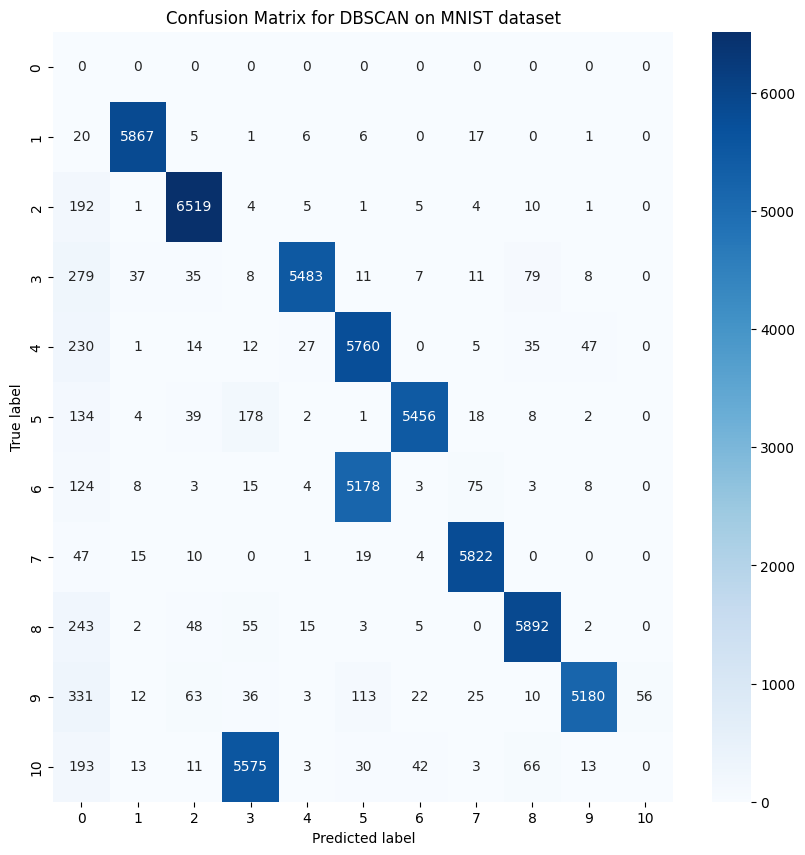

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y, y_dbscan)
# Plot confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for DBSCAN on MNIST dataset Perplexity = 3')
plt.show()

In [ ]:
# G = 5
# Q1. b) DBSCAN clustering
# Perform DBSCAN clustering on the MNIST dataset of G = 2,3,5 dimensions. 
# Check confusion matrix with TSNE into 3 dimensions
# DBSCAN parameters (eps=9.75, minpts=33)

### 3 dimensions
mnist_data = datasets.MNIST(root='./data', train = True, download=True, transform=transforms.ToTensor())

# Perform t-SNE on the MNIST dataset
X = mnist_data.data.numpy().reshape(-1, 28*28)
y = mnist_data.targets.numpy()
X_embedded = TSNE(n_components=3, perplexity=5).fit_transform(X)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=3, min_samples=33)
y_dbscan = dbscan.fit_predict(X_embedded)

# Plot the t-SNE results (color for each label)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_embedded[:, 0], X_embedded[:, 1], X_embedded[:, 2], c=y_dbscan, cmap='tab10', s=10)
plt.title('DBSCAN on MNIST dataset')
plt.show()



In [ ]:
# Perform for G = 2 dimensions 

# Perform t-SNE on the MNIST dataset with 2 dimensions
X_embedded = TSNE(n_components=2).fit_transform(X)



ValueError: Unknown projection '2d'

<Figure size 640x480 with 0 Axes>

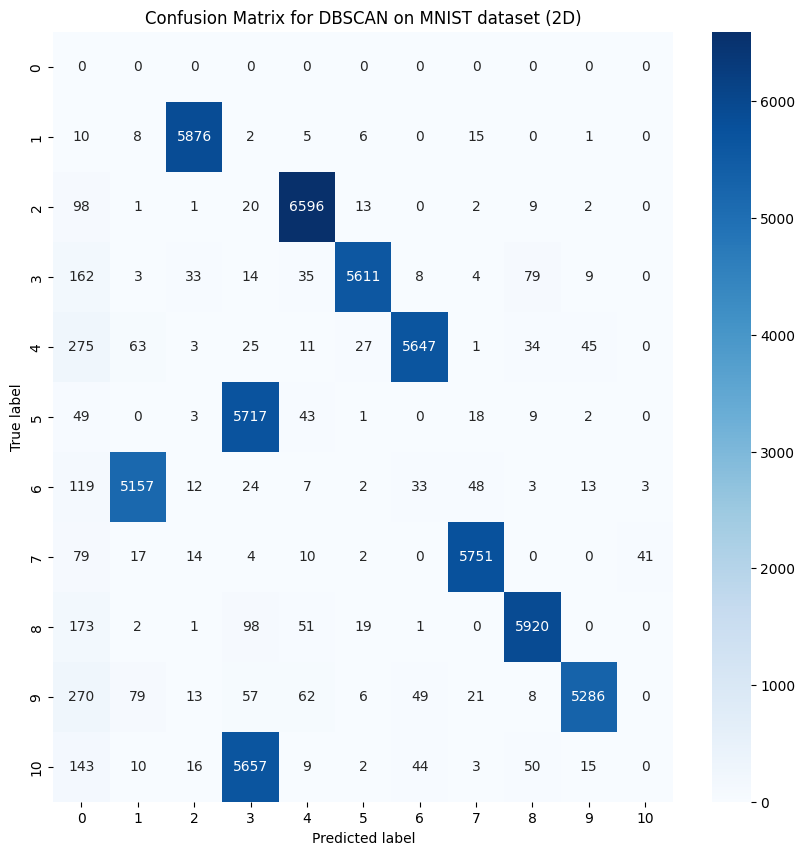

In [39]:
# Perform DBSCAN clustering
# dbscan = DBSCAN(eps=3, min_samples=50)
dbscan = DBSCAN(eps=3, min_samples=55)
y_dbscan = dbscan.fit_predict(X_embedded)

# Plot the t-SNE results in 2d (color for each label)

# show confusion matrix for 2D DBSCAN clustering
cm_2d = confusion_matrix(y, y_dbscan)
# Plot confusion matrix
plt.figure(figsize=(10, 10))

sns.heatmap(cm_2d, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted label')

plt.ylabel('True label')

plt.title('Confusion Matrix for DBSCAN on MNIST dataset (2D)')

plt.show()

In [51]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=2.9, min_samples=50)
y_dbscan = dbscan.fit_predict(X_embedded)

# Plot the t-SNE results in 2d (color for each label)

# show confusion matrix for 2D DBSCAN clustering
cm_2d = confusion_matrix(y, y_dbscan)
# Plot confusion matrix
plt.figure(figsize=(10, 10))

sns.heatmap(cm_2d, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted label')

plt.ylabel('True label')

plt.title('Confusion Matrix for DBSCAN on MNIST dataset (2D)')

plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [70000, 60000]

In [3]:
# Perform for G = 5 dimensions 
# Load the MNIST dataset
mnist_data = datasets.MNIST(root='./data', train = True, download=True, transform=transforms.ToTensor())
# shrink the dataset to save memory:
X = mnist_data.data.numpy().reshape(-1, 28*28) # reshape to 784 dimensions (28*28)
# change dtype to float32 to save memory, if needed
# X = X.astype(np.float32) # to save memory, convert to float32
X = X[:20000]
# Perform t-SNE on the MNIST dataset with 5 dimensions
X_embedded = TSNE(n_components=5, method='exact').fit_transform(X)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=2.9, min_samples=33)
y_dbscan = dbscan.fit_predict(X_embedded)

# Plot the t-SNE results (color for each label)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_embedded[:, 0], X_embedded[:, 1], X_embedded[:, 2], c=y_dbscan, cmap='tab10', s=10)
plt.title('DBSCAN on MNIST dataset')
plt.show()

KeyboardInterrupt: 